In [66]:
import pandas as pd
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

1. (2 mark) Implement the counting measure in Python. Test that it satisfies additivity on the disjoint sets
{"a", "b", "c"}, {"d", "e", "f"}.
Hint: If you have never written a Python function, read https://www.w3schools.com/python/python_
functions.asp, if you have never used Python sets, read https://www.w3schools.com/python/python_
sets.asp.
Bonus mark if your implementation of the counting measure checks that the input type is correct and
raises an error otherwise

In [67]:
setA = {"a", "b", "c"}
setB = {"d", "e", "f"}

#implementing counting measure
def count(setValue):
    
    if type(setValue) is set:
        
        total = 0
        
        for val in setValue:
            total += 1
            
        return total
    
    else:
        print("Please enter a set")
    
    

print("The counting measure of {\"a\", \"b\", \"c\"} is ",count(setA))
print("The counting measure of {\"d\", \"e\", \"f\"} is ",count(setB))
print("The counting measure of both the sets is ",count(setA.union(setB)))

The counting measure of {"a", "b", "c"} is  3
The counting measure of {"d", "e", "f"} is  3
The counting measure of both the sets is  6


2. (2 marks) Create a Python class which implements intervals. Use this new data type to write a function
which implements the length measure on intervals. Test it on the interval [1, 3.5].
Hint: If you have never written a Python class, read https://www.w3schools.com/python/python_
classes.asp.
Bonus mark if your implementation of the length measure checks that the input type is correct and raises
an error otherwise.

In [68]:
#class for creating intervals
class My_Interval:
    
    def __init__(self, start, end, closed):
        
        if (type(start) == int or type(start) == float) and (type(end) == int or type(end) == float) and closed in ["both","left","right","neither"]:
            self.interval = pd.Interval(left=start, right=end, closed=closed)
        else:
            print("Please enter proper values")
            
    # calculates the length measure of an interval
    def calculate_length_measure(self):
        try:
            return self.interval.right - self.interval.left
        except:
            return "{value not available due to error}"

interval_1 = My_Interval(1,3.5,'both')
print("The length measure for interval [1,3.5] is ",interval_1.calculate_length_measure())
        

The length measure for interval [1,3.5] is  2.5


3. (3 marks) Import scipy.stats in order to access the scipy.stats.expon distribution. This implements the exponential distribution Exp(λ). Make sure you read the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html to understand how it works and how
the parameter λ is encoded. Using the cdf method of scipy.stats.expon define a function called
expon_measure which will take as input an interval (defined in the previous question) and will return
its probability mass under the probability measure Exp (2) (i.e. λ = 2). Test your function by computing
the probability measure of the following intervals:
(a) [0, 1]
(b) [1, 1]
(c) [1, 10]
(d) [0, ∞)
Plot the pdf of Exp (2) on comment on whether your answers seem to make sense visually.


The probability mass for [0,1] is  0.8646647167633873
The probability mass for [1,1] is  0.0
The probability mass for [1,10] is  0.13533528117545912
The probability mass for [0,infinity) is  1.0


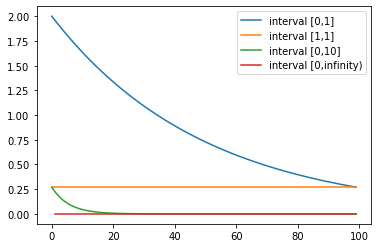

In [69]:
# calculating expon measure using cdf
def expon_measure(interval):
    cdf_result = expon.cdf(interval.interval.right, 0, 1/2) - expon.cdf(interval.interval.left, 0, 1/2)
    return cdf_result

intervalA = My_Interval(0,1,'both')
intervalB = My_Interval(1,1,'both')
intervalC = My_Interval(1,10,'both')
intervalD = My_Interval(0,float('inf'),'left')

print("The probability mass for [0,1] is ",expon_measure(intervalA))
print("The probability mass for [1,1] is ",expon_measure(intervalB))
print("The probability mass for [1,10] is ",expon_measure(intervalC))
print("The probability mass for [0,infinity) is ",expon_measure(intervalD))

#Creating list of values for different intervals and calculating its pdf----
interval_values1 = np.linspace(0,1,num=100)
x1 = expon.pdf(interval_values1,0,1/2)

interval_values2 = np.linspace(1,1,num=100)
x2 = expon.pdf(interval_values2,0,1/2)

interval_values3 = np.linspace(1,10,num=100)
x3 = expon.pdf(interval_values3,0,1/2)

interval_values4 = np.linspace(0,float('inf'),num=100)
x4 = expon.pdf(interval_values4,0,1/2)

# -------

# plotting the pdf values of different intervals
plt.plot(x1,"-", label="interval [0,1]")
plt.legend(loc="upper right")

plt.plot(x2,"-", label="interval [1,1]")
plt.legend(loc="upper right")

plt.plot(x3,"-", label="interval [0,10]")
plt.legend(loc="upper right")

plt.plot(x4,"-", label="interval [0,infinity)")
plt.legend(loc="upper right")

plt.show()

The graph makes sense visually since it shows how the probability is spread out in the interval. For intervals [0,1] and [0,10], we can see the similar curves as the probability density drops as the values get bigger, while intervals [1,1] and [0,infinity) are in straight lines due to the following reasons. Interval [1,1] defines as a point therefore it has the pdf 0 and interval [0,infinity) has the average pdf 1 as it sums up all the probability to 1 and remains as 1.

4. (3 marks) Using the pdf method of scipy.stats.expon, define a function called expon_pdf which will
take one argument x and return the pdf of the probability measure Exp (2) evaluated at x. Import
the integration routine quad from scipy.integrate, and read the documentation https://docs.scipy.
org/doc/scipy/reference/generated/scipy.integrate.quad.html to see how it works. Use quad to
compute and print the following integrals
(a) R 1
0
expon_pdf(x) dx
(b) R 1
1
expon_pdf(x) dx
(c) R 10
1
expon_pdf(x) dx
(d) R ∞
0
expon_pdf(x) dx
Compare your answers with those of the previous question. What do you see? Why is this the case?

In [70]:
from scipy import integrate 

# a function that calculates the pdf of a given value
expon_pdf = lambda x:expon.pdf([x],0,1/2)

#calculates the intergration of the expon_pdf function with intervals
def intergrate_func(lower_limit,upper_limit,function):
    res = integrate.quad(function,lower_limit,upper_limit)
    return res[0]

print("a) ",intergrate_func(0,1,expon_pdf))
print("b) ",intergrate_func(1,1,expon_pdf))
print("c) ",intergrate_func(1,10,expon_pdf))
print("d) ",intergrate_func(0,float('inf'),expon_pdf))

a)  0.8646647167633872
b)  0.0
c)  0.13533528117545912
d)  1.0


The values are same to question 3 since both of them calculate the cdf in a different manner for the same distribution and intervals. The question 3 calculates the cdf directly by getting the difference of the cdf of the upper bound and lower bound of the interval respectively, while question 4 calculates the cdf by integrating the interval of the distribution."